In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data = pd.read_excel("C:\\Users\\BaeJunho\\klaytn_데이터.xlsx", sheet_name='Sheet1',encoding='cp949')
data.head()

,Player,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP% (킬관여율),DMG%,DPM,VSPM(Vision Score - 시야점수),Avg WPM(wards per minute),Avg WCPM (ward clear),Avg VWPM(비전 와드?),GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills
0,Aiming,SUPPORT,3,0.667,20.5,3.0,0.7,10.7,2.4,316,0.876,25.0,467,3.40,1.52,0.92,0.22,675,4,651,0.333,0.000,0,-
1,Aiming,ADC,38,0.421,4.1,4.2,1.9,3.9,10.2,444,0.712,32.2,629,1.32,0.44,0.41,0.14,-4,6,-38,0.158,0.053,1,6
2,Bdd,MID,41,0.707,6.1,3.8,1.6,5.8,8.8,422,0.628,26.3,521,1.09,0.47,0.22,0.26,301,7,171,0.220,0.098,0,8
3,Ben,SUPPORT,38,0.553,3.3,0.3,2.5,8.0,0.9,220,0.655,7.4,141,2.32,1.51,0.25,0.51,-141,-3,-24,0.263,0.079,0,-
4,BeryL,ADC,6,0.667,6.8,4.2,1.7,7.2,7.1,403,0.729,17.4,372,1.02,0.46,0.18,0.23,689,-8,516,0.333,0.167,0,1


In [16]:
#결측값(-) 제거
data['Solo Kills'] = data['Solo Kills'].apply(lambda x:0 if x=="-" else x)
meanavg = np.mean(data['Avg deaths'])
data['Avg deaths'] = data['Avg deaths'].fillna(meanavg)

 #scaling
object_ = ['Player','Position']
data_noneed = data[object_]
data_toscale = data.drop(object_, axis=1)

scaler = StandardScaler()
scaler.fit(data_toscale)
scaled_matrix = scaler.transform(data_toscale)
scaled_data = pd.DataFrame(scaled_matrix)
scaled_data.columns = list(data_toscale)

data = pd.concat([data_noneed, scaled_data], axis=1)


#중복되는 선수 제거
unique_list = data.groupby(['Player'])['Games'].max()
unique_df = pd.DataFrame(unique_list).reset_index()
unique_df2 = pd.merge(data, unique_df, on=["Player","Games"],how="right")
data = unique_df2

data.head()

Player                       0
Position                     0
Games                        0
Win rate                     0
KDA                          0
Avg kills                    0
Avg deaths                   0
Avg assists                  0
CSM                          0
GPM                          0
KP% (킬관여율)                   0
DMG%                         0
DPM                          0
VSPM(Vision Score - 시야점수)    0
Avg WPM(wards per minute)    0
Avg WCPM (ward clear)        0
Avg VWPM(비전 와드?)             0
GD@15                        0
CSD@15                       0
XPD@15                       0
FB %                         0
FB Victim                    0
Penta Kills                  0
Solo Kills                   0
dtype: int64

,Player,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP% (킬관여율),DMG%,DPM,VSPM(Vision Score - 시야점수),Avg WPM(wards per minute),Avg WCPM (ward clear),Avg VWPM(비전 와드?),GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills
0,Aiming,ADC,0.697157,-0.060767,0.284734,1.651638,-0.760259,-0.799965,1.216116,1.318262,1.109261,1.636694,1.790052,-0.400518,-0.600237,0.495404,-1.125331,0.199546,0.938116,0.044257,-0.536688,-0.563535,4.031129,0.238783
1,Bdd,MID,0.922644,1.029397,1.167730,1.321071,-1.086771,0.351247,0.774640,1.033810,-0.131912,0.902562,1.087938,-0.773536,-0.542926,-0.830055,-0.327579,1.068095,1.077922,0.751831,-0.134313,-0.040746,-0.248069,0.589338
2,Ben,SUPPORT,0.697157,0.442385,-0.068464,-1.571392,-0.107237,1.684229,-1.716548,-1.577980,0.267036,-1.449149,-1.382464,1.221298,1.443835,-0.620772,1.334403,-0.190590,-0.320135,0.091654,0.144753,-0.261479,-0.248069,-0.812879
3,BeryL,SUPPORT,0.171021,1.776502,0.637932,-0.331765,-0.651422,1.805409,-1.495809,-0.957356,-0.988913,-1.250062,-0.992400,2.810679,2.016939,1.890624,1.068486,0.985512,0.938116,0.176292,-0.932573,-0.052363,-0.248069,-0.812879
4,Beyond,JUNGLE,0.922644,-0.270414,-0.421662,-0.414407,0.328112,0.230067,-0.392119,-0.595326,0.606881,-0.963875,-0.998901,-0.076155,-0.562030,0.844209,0.603131,-0.614897,-0.180329,-0.808894,-0.296561,0.238075,-0.248069,-0.637602


In [18]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

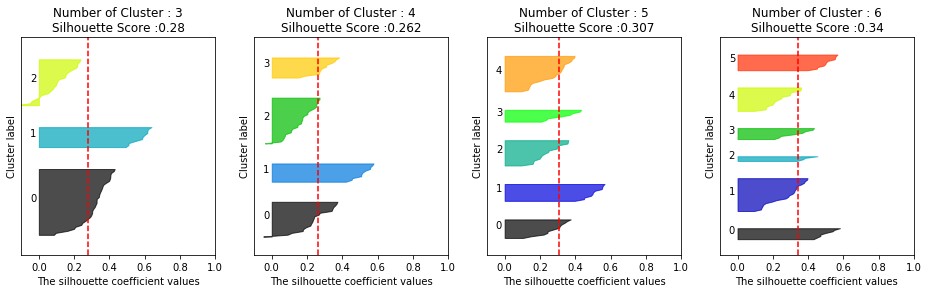

In [51]:
visualize_silhouette([3,4,5,6], scaled_data)

In [54]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_data)
scaled_data['cluster'] = kmeans.predict(scaled_data)

In [55]:
pd.set_option('display.max_colwidth', -1)
show_ = pd.concat([data_noneed, scaled_data], axis=1)
show_all = show_.groupby('cluster')['Player'].apply(list).reset_index()
show_all

C:\Users\BaeJunho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,cluster,Player
0,0,[Malrang ]
1,1,"[DuDu , FATE , Fly , Kiin , Kuzan , Rich , Route , Smeb , SoHwan , Summit , Trigger , Ucal , Viper , deokdam , kurO ]"
2,2,"[Bdd , Canna , Chovy , Clozer , Deft , Doran , Faker , Ghost , Nuguri , Rascal , Ruler , Teddy ]"
3,3,"[Jelly , Kabbie , Kuri , Mia , Secret ]"
4,4,"[Clid , Cuzz , Ellim , OnFleek , Pyosik , Spirit , bono ]"
5,5,"[CuVee , Dove , HyBrid , Ikssu , Keine , Lava , Mickey , Mireu ]"
6,6,"[Ben , BeryL , Effort , GorillA , GuGer , Kellin , Keria , Lehends , Life , TusiN ]"
7,7,[Dread ]
8,8,"[Aiming , Mystic ]"
9,9,"[Beyond , CAD , Flawless , Haru , Kuma , Yeongjae ]"


In [24]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(scaled_data[scaled_data['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = scaled_data[scaled_data['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
    
#_____________________________________________________
print('number of customers:', merged_df['size'].sum())

number of customers: 69


In [25]:
merged_df = merged_df.reset_index()
merged_df

,cluster,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSM,GPM,KP% (킬관여율),DMG%,DPM,VSPM(Vision Score - 시야점수),Avg WPM(wards per minute),Avg WCPM (ward clear),Avg VWPM(비전 와드?),GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,size
0,0.0,-0.224833,-0.054160,-0.312760,-1.339995,0.473228,0.718827,-1.657684,-1.533157,-0.470772,-1.376150,-1.337390,1.593235,1.842461,-0.030129,1.374291,-0.161353,0.006079,-0.102675,-0.265409,-0.393144,-0.248069,-0.766139,15
1,1.0,-0.057882,-0.588003,-0.473839,0.111496,0.283588,-0.761407,0.654237,0.426116,-0.244074,0.734017,0.542144,-0.809658,-0.576791,-0.544669,-0.714368,-0.595740,-0.631520,-0.489270,-0.347005,-0.025960,-0.248069,0.183013,22
2,2.0,0.588589,1.042315,1.025469,1.220064,-0.887236,0.283925,0.835956,1.085529,0.269499,0.811314,1.013898,-0.524857,-0.564152,-0.244837,-0.829867,1.108912,0.914815,0.996717,-0.001270,-0.080116,0.702863,0.774352,18
3,3.0,-0.424908,-0.358085,-0.238756,-0.308153,0.188064,0.061280,-0.326798,-0.422623,0.541445,-0.722127,-0.722606,0.240099,-0.342340,1.202980,0.717096,-0.316702,-0.190315,-0.402632,0.831294,0.565026,-0.248069,-0.462325,14
